In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import f_classif
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
base_dir = "F:\Resources & Codes\Lab Dataset\Bangladeshi Crops Dataset\BangladeshiCrops\Crop___Disease\Wheat"
image_size = 224
batch_size = 32

In [3]:
feature_extraction_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [4]:
all_images = []
all_labels = []

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
            img_array = keras.preprocessing.image.img_to_array(img)
            all_images.append(img_array)
            all_labels.append(class_folder)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [7]:
X_train = np.reshape(X_train, (-1, image_size, image_size, 3))

In [8]:
train_data = feature_extraction_datagen.flow(
    X_train, keras.utils.to_categorical(y_train), batch_size=batch_size, shuffle=False
)

In [9]:
X_test = np.reshape(X_test, (-1, image_size, image_size, 3))

In [10]:
test_data = feature_extraction_datagen.flow(
    X_test, keras.utils.to_categorical(y_test), batch_size=batch_size, shuffle=False
)

In [11]:
print(X_train)
print(X_test)

[[[[140. 120.  61.]
   [154. 133.  68.]
   [154. 133.  68.]
   ...
   [ 52.  32.   7.]
   [ 52.  32.   7.]
   [ 48.  32.   6.]]

  [[154. 132.  74.]
   [164. 140.  76.]
   [164. 140.  76.]
   ...
   [ 41.  21.   0.]
   [ 41.  21.   0.]
   [ 48.  32.   6.]]

  [[174. 150.  88.]
   [199. 176. 109.]
   [199. 176. 109.]
   ...
   [ 54.  33.   2.]
   [ 54.  33.   2.]
   [ 51.  32.   2.]]

  ...

  [[119.  85.  24.]
   [111.  80.  23.]
   [111.  80.  23.]
   ...
   [ 74.  50.  12.]
   [ 74.  50.  12.]
   [ 73.  50.   9.]]

  [[ 92.  59.  18.]
   [ 83.  55.  15.]
   [ 83.  55.  15.]
   ...
   [ 71.  53.  15.]
   [ 71.  53.  15.]
   [ 68.  53.  12.]]

  [[ 81.  58.  16.]
   [ 83.  64.  22.]
   [ 83.  64.  22.]
   ...
   [ 71.  53.  15.]
   [ 71.  53.  15.]
   [ 67.  52.  11.]]]


 [[[122. 143. 126.]
   [122. 143. 126.]
   [113. 134. 117.]
   ...
   [101.  74.  31.]
   [ 94.  67.  24.]
   [ 94.  67.  24.]]

  [[112. 133. 116.]
   [112. 133. 116.]
   [112. 133. 116.]
   ...
   [108.  79.  35.]
 

In [12]:
print(y_train)
print(y_test)

[0 0 1 ... 0 0 1]
[1 0 1 1 1 0 1 0 1 0 2 0 2 1 2 2 2 1 1 1 0 1 0 1 1 2 2 1 2 2 2 2 2 2 1 1 2
 2 1 2 0 0 1 1 0 1 0 0 2 2 2 2 2 0 0 0 0 1 0 1 0 2 0 2 2 2 1 2 1 0 1 2 2 0
 2 1 2 0 0 1 2 2 2 0 0 2 0 2 1 0 2 1 1 1 1 1 1 1 0 0 0 0 1 0 1 2 1 1 0 0 1
 2 2 1 1 2 0 2 2 0 1 0 1 2 0 0 0 2 2 0 1 1 2 0 1 1 1 1 2 2 0 1 0 1 1 0 2 1
 2 2 1 2 0 1 1 0 0 1 2 1 2 2 2 0 0 1 2 1 2 1 1 2 2 2 0 1 2 0 2 2 1 0 0 0 2
 2 0 2 0 0 1 1 1 0 0 1 1 1 2 1 2 1 0 2 1 0 2 0 2 2 1 1 2 0 1 2 1 0 2 1 0 1
 1 1 1 0 1 0 0 2 2 1 0 1 1 0 0 1 0 0 2 1 0 0 1 1 0 2 0 0 0 0 0 2 2 2 0 2 2
 0 2 0 0 0 0 1 1 1 2 1 2 0 1 2 2 0 0 1 1 1 1 1 1 1 2 2 0 1 1 2 1 1 1 2 2 2
 2 2 0 0 0 1 1 0 2 1 2 2 0 2 2 0 1 1 0 2 0 0 0 0 2 0 2 0 1 1 1 1 2 0 0 2 2
 2 0 1 1 2 2 0 0 1 2 1 2 1 1 1 0 2 0 2 2 2 1 2 1 1 2 0 2 1 0 0 2 0 2 1 1 1
 1 1 0 0 0 2 0 0 2 2 1 0 2 2 1 0 1 0 1 2 1 2 0 0 1 2 0 1 0 2 1 1 1 0 0 1 1
 0 1 2 1 1 2 2 1 1 1 1 0 1 2 2 1 1 1 1 0 1 0 1 1 0 2 1 1 2 2 2 0 0 0 1 1 0
 0 2 1 2 2 0 1 0 1 1 0 0 2 1 2 2 1 0 1 1 1 0 0 0 2 0 2 1 1 1 2 0 0 1 1 0 0
 1 1 0 

In [13]:
# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_test_features_std = scaler.fit_transform(X_test_features)


1/1 [==============================] - 0s 47ms/step


In [14]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')
X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)  # Use transform instead of fit_transform

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)

Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   3   65   74  115  150  157  171  237  328  336  360  415  430  438
  439  441  464  558  602  616  646  656  682  728  776  793  794  866
  878  893  896  965  992 1003 1056 1062 1064 1153 1171 1184 1333 1339
 1340 1343 1353 1356 1358 1440 1549 1614 1644 1657 1710 1773 1788 1796
 1907 2589 2765 2940 2988 3040 3198] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Support Vector Machine (SVM)

In [15]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)

# Predict on test set
svm_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy * 100)

SVM Classifier Accuracy: 99.66044142614601


Precision, Recall, and F1 score for SVM

In [16]:
svm_predictions = svm_classifier.predict(X_test_selected)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.9966044142614601
SVM Recall: 0.9966044142614601
SVM F1 Score: 0.9966044142614601


Logistic Regression

In [17]:
logreg = LogisticRegression(random_state=42,max_iter=1000)

history = logreg.fit(X_train_selected, y_train)

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Predict on the test set using the loaded model
predictions = loaded_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Test Accuracy:", accuracy * 100)

Logistic Regression Test Accuracy: 99.66044142614601


Precision, Recall, and F1 score for Logistic Regression

In [18]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9966044142614601
Recall: 0.9966044142614601
F1 Score: 0.9966044142614601


DNN

In [19]:
# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Define the DNN model
def build_dnn_model(input_dim, num_of_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_of_classes, activation='softmax')  # Use 'softmax' for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Check the number of features after ANOVA feature selection
num_selected_features = len(selected_features_indices)

# Build the DNN model
dnn_model = build_dnn_model(num_selected_features, 3)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the DNN model with one-hot encoded labels
history = dnn_model.fit(X_train_selected, y_train_one_hot,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test_selected, y_test_one_hot), callbacks=[checkpoint])

Epoch 1/100
71/74 [===========================>..] - ETA: 0s - loss: 0.2447 - accuracy: 0.9384
Epoch 1: val_accuracy improved from -inf to 0.98302, saving model to model_checkpoint.h5
74/74 [==============================] - 3s 16ms/step - loss: 0.2372 - accuracy: 0.9401 - val_loss: 0.0593 - val_accuracy: 0.9830
Epoch 2/100
73/74 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9829
Epoch 2: val_accuracy improved from 0.98302 to 0.98812, saving model to model_checkpoint.h5
74/74 [==============================] - 1s 8ms/step - loss: 0.0963 - accuracy: 0.9830 - val_loss: 0.0653 - val_accuracy: 0.9881
Epoch 3/100
74/74 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9885
Epoch 3: val_accuracy improved from 0.98812 to 0.98981, saving model to model_checkpoint.h5
74/74 [==============================] - 1s 8ms/step - loss: 0.0586 - accuracy: 0.9885 - val_loss: 0.0431 - val_accuracy: 0.9898
Epoch 4/100
64/74 [========================>.....] - E

Precision, Recall, and F1 score for DNN

In [20]:
# Predict on the test set using the DNN model
dnn_predictions = dnn_model.predict(X_test_selected)
dnn_predictions = np.argmax(dnn_predictions, axis=1)  # Convert one-hot encoded predictions to class labels

dnn_precision = precision_score(y_test, dnn_predictions, average='weighted')
dnn_recall = recall_score(y_test, dnn_predictions, average='weighted')
dnn_f1 = f1_score(y_test, dnn_predictions, average='weighted')

print("DNN Precision:", dnn_precision)
print("DNN Recall:", dnn_recall)
print("DNN F1 Score:", dnn_f1)


19/19 [==============================] - 0s 2ms/step
DNN Precision: 0.9932071808202132
DNN Recall: 0.9932088285229203
DNN F1 Score: 0.9932038260230598


Plot training and validation accuracy

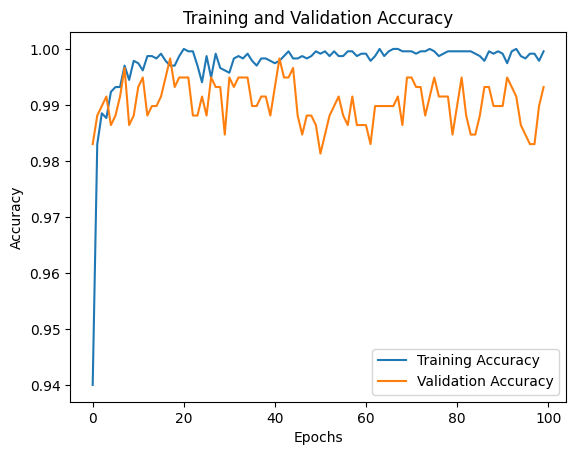

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot training and validation loss

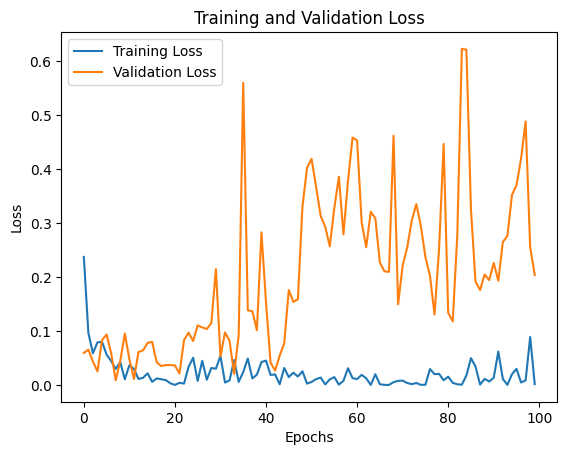

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()